# Unsupervised learning


Unsupervised learning is a machine learning technique in which models are not supervised using training dataset. Instead, models itself find the hidden patterns and insights from the given data. It can be compared to learning which takes place in the human brain while learning new things.




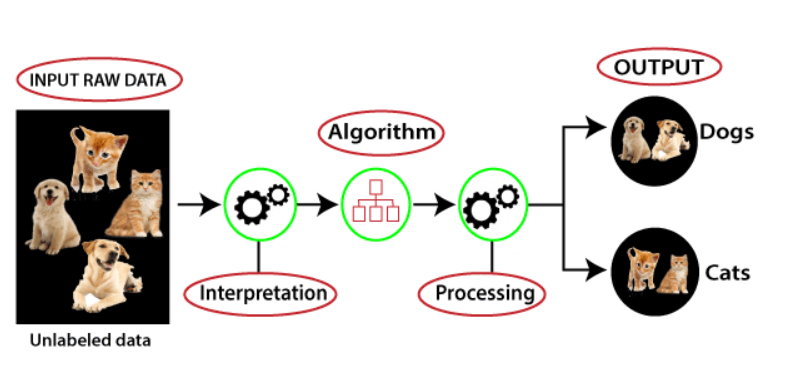

## Types of Unsupervised learning

*   K-means clustering
*   KNN (k-nearest neighbors)
*   Hierarchal clustering
*   Density based clustering



---



# Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.shape

(200, 5)

In [ ]:
print("Number of rows:",data.shape[0])
print("Number of colomns:",data.shape[1])

Number of rows: 200
Number of colomns: 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# selecting data to form cluster
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#K-MEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans()
k_means.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
k_means = KMeans()
k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 6, 4, 6, 4,
       3, 4, 6, 4, 6, 4, 6, 4, 6, 4, 3, 4, 6, 4, 3, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 6, 4, 3, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4,
       6, 4, 6, 4, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2], dtype=int32)

## Elbow method to find optimal number of cluters.
  

In [ ]:
# checking value for different number of clusturs
wcss=[]
for i in range(1, 11):
  k_means = KMeans(n_clusters=i)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25028.020475269415,
 21838.86369282892,
 19672.072849014323]

In [ ]:
import matplotlib.pyplot as plt

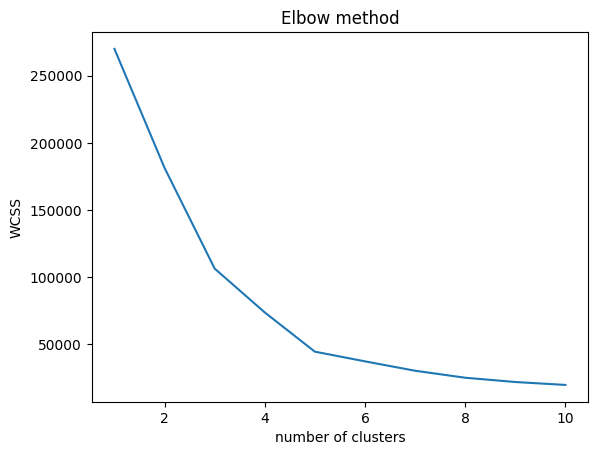

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

## MODEL TRAINING

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
k_means = KMeans(n_clusters = 5, random_state=42 , n_init="auto")
y_means = k_means.fit_predict(X)

In [ ]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

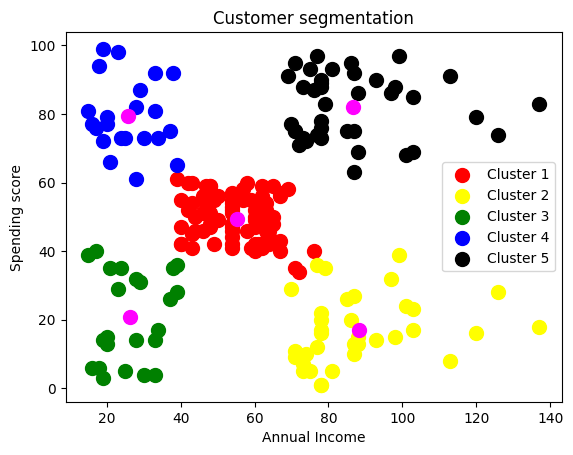

In [ ]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1], s=100, c='red',label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1], s=100, c='yellow',label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1], s=100, c='green',label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1], s=100, c='blue',label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1], s=100, c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s=100, c='magenta')
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("Customer segmentation")
plt.legend()
plt.show()

In [ ]:
k_means.predict([[15, 39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

## Save the model


In [ ]:
import joblib

In [ ]:
# save the model for further use
joblib.dump(k_means,"Customer_segmentation")

['Customer_segmentation']

In [ ]:
# load the model
model = joblib.load("Customer_segmentation")

In [ ]:
model.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

## PREDICTION


In [ ]:
from sklearn.cluster import KMeans
import joblib
import ipywidgets as widgets
from IPython.display import display


model = joblib.load("Customer_segmentation")

def predict_cluster(b):

    income = float(income_input.value)
    spending_score = float(spending_input.value)


    prediction = model.predict([[income, spending_score]])


    result_label.value = f"Predicted Cluster: {prediction[0]}"

# input widgets
income_input = widgets.FloatText(description="Annual Income:")
spending_input = widgets.FloatText(description="Spending Score:")
predict_button = widgets.Button(description="Predict")
result_label = widgets.Label(value="Predicted Cluster: -")


predict_button.on_click(predict_cluster)

# Display widgets
display(income_input, spending_input, predict_button, result_label)


FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score:')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster: -')

# DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## MODEL TRAINING

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)


In [ ]:
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

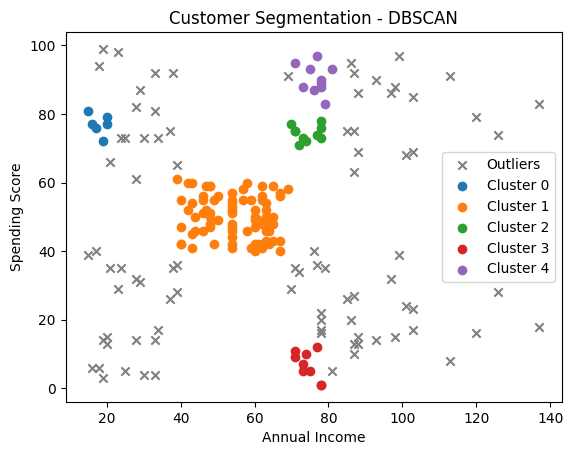

In [ ]:
import numpy as np

# Assuming -1 represents outliers in DBSCAN
outliers = y_dbscan == -1

# Plotting outliers separately
plt.scatter(X.iloc[outliers, 0], X.iloc[outliers, 1], c='gray', marker='x', label='Outliers')

# Plotting other clusters
for cluster_label in np.unique(y_dbscan[y_dbscan != -1]):
    plt.scatter(X.iloc[y_dbscan == cluster_label, 0], X.iloc[y_dbscan == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation - DBSCAN')
plt.legend()
plt.show()

## Prediction

In [ ]:
def predict_dbscan(b):
    annual_income = float(income_input.value)
    spending_score = float(spending_input.value)

    # New point to predict
    new_point = np.array([[annual_income, spending_score]])

    # Combine the new point with the existing dataset
    combined_data = np.concatenate([X, new_point])


    y_combined_dbscan = dbscan.fit_predict(combined_data)

    # The cluster label for the new point
    predicted_cluster = y_combined_dbscan[-1]
    new_point_cluster_label.value = f"Predicted Cluster: {predicted_cluster}"

In [ ]:
# input widgets
income_input = widgets.FloatText(description="Annual Income:")
spending_input = widgets.FloatText(description="Spending Score:")
predict_button = widgets.Button(description="Predict")
new_point_cluster_label = widgets.Label(value="Predicted Cluster: -")


predict_button.on_click(predict_dbscan)

# Display widgets
display(income_input, spending_input, predict_button,  new_point_cluster_label)

FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score:')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster: -')

# HDBSCAN

In [ ]:
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
X = df.iloc[:,[3,4]].values

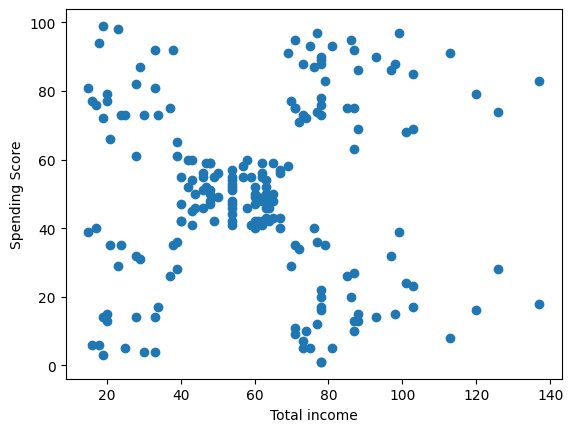

In [ ]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel("Total income")
plt.ylabel("Spending Score")
plt.show()

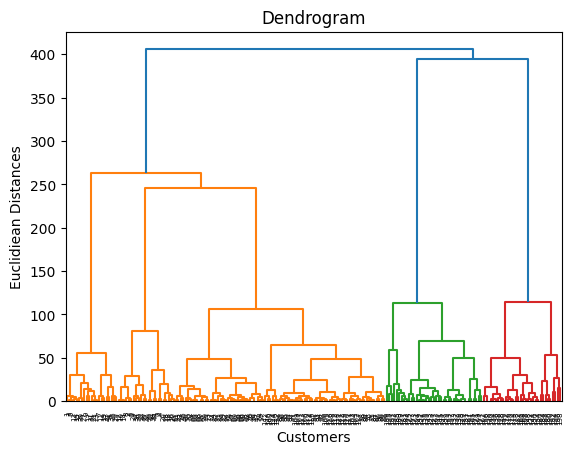

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidiean Distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Y_hc = hc.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
Y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

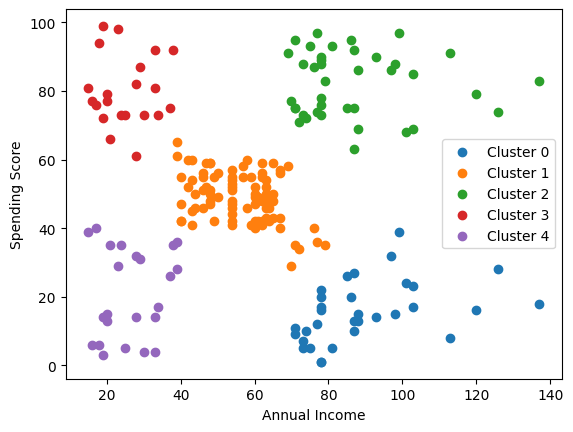

In [ ]:
plt.scatter(X[Y_hc == 0,0],X[Y_hc == 0,1],label='Cluster 0')
plt.scatter(X[Y_hc == 1,0],X[Y_hc == 1,1],label='Cluster 1')
plt.scatter(X[Y_hc == 2,0],X[Y_hc == 2,1],label='Cluster 2')
plt.scatter(X[Y_hc == 3,0],X[Y_hc == 3,1],label='Cluster 3')
plt.scatter(X[Y_hc == 4,0],X[Y_hc == 4,1],label='Cluster 4')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
df['Target'] = Y_hc
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [ ]:
import joblib

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def predict_cluster(b):
    income = float(income_input.value)
    spending_score = float(spending_input.value)

    # Checking if there are at least two samples in the original dataset
    if X.shape[0] < 2:
        result_label.value = "Insufficient data for clustering."
        return

    # Concatenating the new point with the existing dataset
    combined_data = np.vstack([X, np.array([[income, spending_score]])])


    model.fit(combined_data)


    prediction = model.labels_[-1]

    result_label.value = f"Predicted Cluster: {prediction}"

income_input = widgets.FloatText(description="Annual Income:")
spending_input = widgets.FloatText(description="Spending Score")
predict_button = widgets.Button(description="Predict")
result_label = widgets.Label(value="Predicted Cluster: - ")

predict_button.on_click(predict_cluster)

display(income_input, spending_input, predict_button, result_label)


FloatText(value=0.0, description='Annual Income:')

FloatText(value=0.0, description='Spending Score')

Button(description='Predict', style=ButtonStyle())

Label(value='Predicted Cluster: - ')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

# Comparitive analyisis


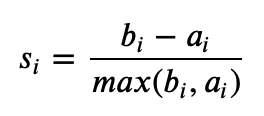
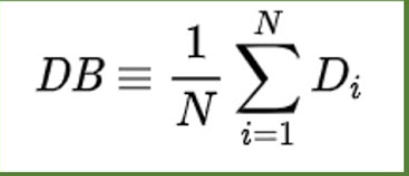

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def comp_k(X, y_kmeans):
    # Silhouette Score
    silhouette_kmeans = silhouette_score(X, y_kmeans)

    # Davies-Bouldin Index
    davies_bouldin_kmeans = davies_bouldin_score(X, y_kmeans)

    return silhouette_kmeans, davies_bouldin_kmeans

In [ ]:
def comp_d(X, y_dbscan):
    # Silhouette Score
    silhouette_dbscan = silhouette_score(X, y_dbscan)

    # Davies-Bouldin Index
    davies_bouldin_dbscan = davies_bouldin_score(X, y_dbscan)

    return silhouette_dbscan, davies_bouldin_dbscan

In [ ]:
def comp_h(X, Y_hc):
    # Silhouette Score
    silhouette_agg = silhouette_score(X, Y_hc)

    # Davies-Bouldin Index
    davies_bouldin_agg = davies_bouldin_score(X, Y_hc)

    return silhouette_agg, davies_bouldin_agg

In [ ]:
silhouette_kmeans, davies_bouldin_kmeans = comp_k(X, y_means)
silhouette_dbscan, davies_bouldin_dbscan = comp_d(X, y_dbscan)
silhouette_agg, davies_bouldin_agg = comp_h(X, Y_hc)


K-means Silhouette Score: 0.553931997444648
K-means Davies-Bouldin Index: 0.5725628995597081

DBSCAN Silhouette Score: 0.1135163893571667
DBSCAN Davies-Bouldin Index: 2.552071407323332

Hierarchical Clustering Silhouette Score: 0.5529945955148897
Hierarchical Clustering Davies-Bouldin Index: 0.5782207452369454



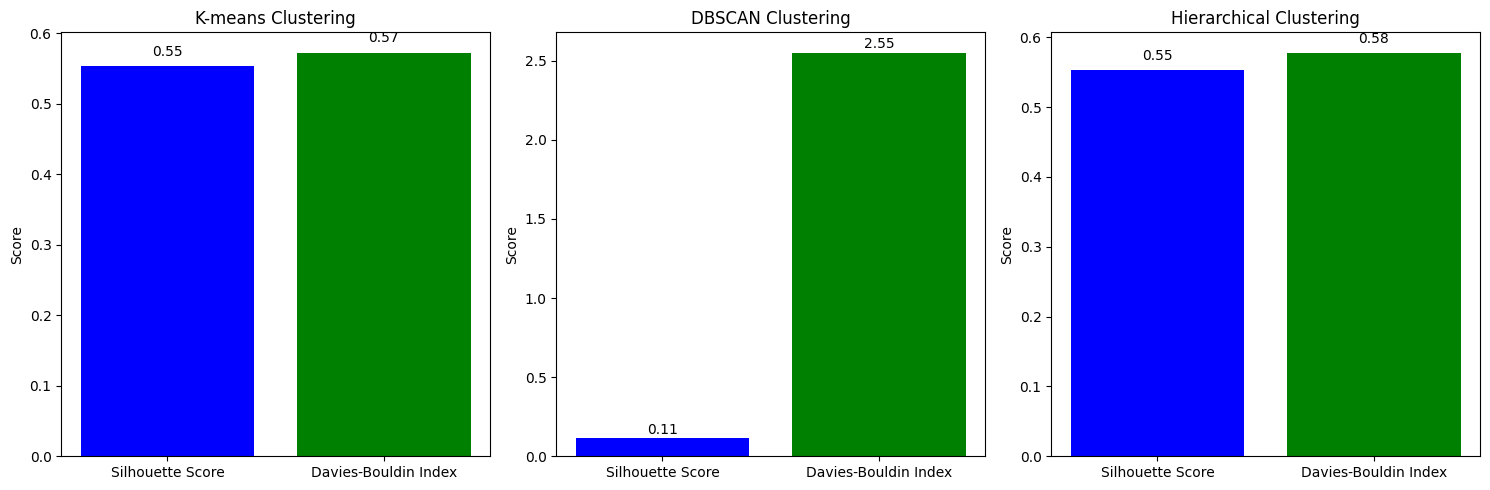

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# K-means metrics
axes[0].bar(['Silhouette Score', 'Davies-Bouldin Index'], [silhouette_kmeans, davies_bouldin_kmeans], color=['blue', 'green'])
axes[0].set_ylabel('Score')
axes[0].set_title('K-means Clustering')
axes[0].text(0, silhouette_kmeans + 0.01, f"{silhouette_kmeans:.2f}", ha='center', va='bottom')
axes[0].text(1, davies_bouldin_kmeans + 0.01, f"{davies_bouldin_kmeans:.2f}", ha='center', va='bottom')

# DBSCAN metrics
axes[1].bar(['Silhouette Score', 'Davies-Bouldin Index'], [silhouette_dbscan, davies_bouldin_dbscan], color=['blue', 'green'])
axes[1].set_ylabel('Score')
axes[1].set_title('DBSCAN Clustering')
axes[1].text(0, silhouette_dbscan + 0.01, f"{silhouette_dbscan:.2f}", ha='center', va='bottom')
axes[1].text(1, davies_bouldin_dbscan + 0.01, f"{davies_bouldin_dbscan:.2f}", ha='center', va='bottom')

# Hierarchical Clustering metrics
axes[2].bar(['Silhouette Score', 'Davies-Bouldin Index'], [silhouette_agg, davies_bouldin_agg], color=['blue', 'green'])
axes[2].set_ylabel('Score')
axes[2].set_title('Hierarchical Clustering')
axes[2].text(0, silhouette_agg + 0.01, f"{silhouette_agg:.2f}", ha='center', va='bottom')
axes[2].text(1, davies_bouldin_agg + 0.01, f"{davies_bouldin_agg:.2f}", ha='center', va='bottom')


plt.tight_layout()

print(f"\nK-means Silhouette Score: {silhouette_kmeans}")
print(f"K-means Davies-Bouldin Index: {davies_bouldin_kmeans}\n")

print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
print(f"DBSCAN Davies-Bouldin Index: {davies_bouldin_dbscan}\n")

print(f"Hierarchical Clustering Silhouette Score: {silhouette_agg}")
print(f"Hierarchical Clustering Davies-Bouldin Index: {davies_bouldin_agg}\n")

plt.show()